## Exploratory Data Analysis

In [3]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact 
from ipywidgets import widgets

Initial Data Loading and Cleaning

In [4]:
#define relative path to dataset
path_train = '../data/external/sign_mnist_train.csv'
path_test = '../data/external/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

In [5]:
#saving data into pandas dataframes 
train = pd.read_csv(path_test)
test = pd.read_csv(path_train)


In [6]:
#printing shape
print(f'Train Shape:{train.shape}')
print(f'Test Shape:{test.shape}')

Train Shape:(7172, 785)
Test Shape:(27455, 785)


The training dataset consists of 27455 28x28 pixel grayscale images, including the associated label. The testing dataset consists of 7172 28x28 images. The label and pixels are split into X and y for both training and testing data. 

In [7]:
#training data 
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

#testing data
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

The below is a function to find the indices of a specified label. 

In [8]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')
        

Creating a dictionary where key is the numeric label in the dataset and value is the corresponding letter. 

In [9]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(y_train.unique()))
#dictionary of labels 
labels = dict(zip(numbers,letters))

Inspecting examples for each letter in the dataset. 

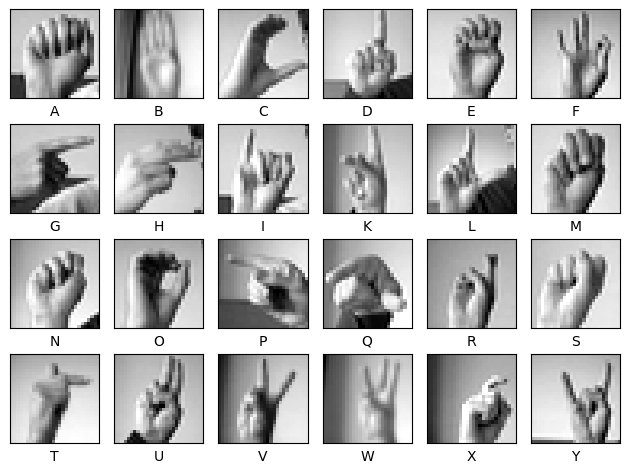

In [10]:
#visualization of dataset 
fix, ax = plt.subplots(4,6)
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0]
    #display first found image 
    ax[pos].imshow(X_train.iloc[idx,:].values.reshape(res),cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

### Exploratory Data Analysis

Checking for any class imbalances in the training data. Looking at the plot below, potentially under-represented letters in the training dataset include R and Q. The highest represented letters are E, B, and H. 

Text(0, 0.5, 'Data Point Count')

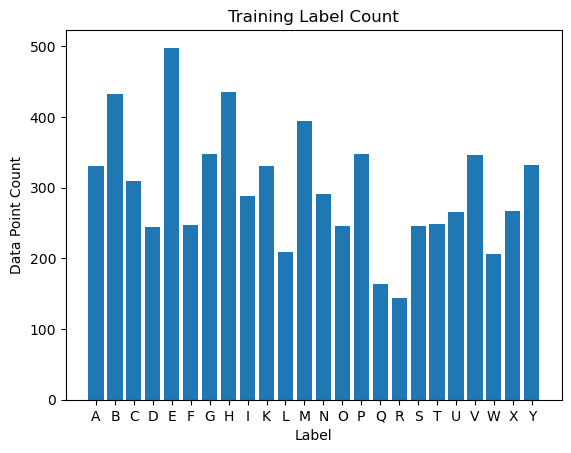

In [11]:
#counting the number of labels in the training data 
label, count = zip(*sorted(dict(y_train.value_counts()).items()))

#plotting 
plt.bar(letters, count)
plt.title('Training Label Count')
plt.xlabel('Label')
plt.ylabel('Data Point Count')

The general descriptive statistics of the training dataset is calculated.

In [12]:
#calculate descriptive statistics 
descr_stats = X_train.describe()
descr_stats

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,167.311350,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,32.361682,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,149.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,170.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,188.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [28]:
#find max and min descriptive statistics 
for i in descr_stats.index:
    if i in ['count','max']:
        continue
    print(f'max {i}: {descr_stats.loc[i].idxmax()}')
    print(f'min {i}: {descr_stats.loc[i].idxmin()}\n')

max mean: pixel483
min mean: pixel772

max std: pixel784
min std: pixel23

max min: pixel150
min min: pixel1

max 25%: pixel476
min 25%: pixel746

max 50%: pixel482
min 50%: pixel773

max 75%: pixel510
min 75%: pixel379



Histograms of the pixel intensities are displayed in the interactive plot below. In general, the distributions for all pixels are similar, in that they are left skewed, unimodal distributions. This can also be concluded from the descriptive statistics above. 

In [27]:
def pixel_histogram(pixel):
    plt.hist(X_train[pixel])
    plt.title(f'Distribution of Pixel Intensities: {pixel}')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')

interact(pixel_histogram,pixel=list(X_train.columns));
    

interactive(children=(Dropdown(description='pixel', options=('pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',…